In [ ]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.cem import CEMAgent
from rl.memory import EpisodeParameterMemory

import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)

nb_actions = env.action_space.n
obs_dim = env.observation_space.shape[0]

# Option 1 : Simple model
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(nb_actions))
model.add(Activation('softmax'))

In [ ]:
env.observation_space

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

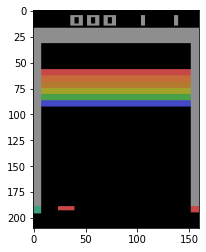

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(500):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('softmax'))

In [ ]:
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = EpisodeParameterMemory(limit=1000, window_length=1)

cem = CEMAgent(model=model, nb_actions=nb_actions, memory=memory,
               batch_size=50, nb_steps_warmup=2000, train_interval=50, elite_frac=0.05)
cem.compile()

cem2 = CEMAgent(model=model, nb_actions=nb_actions, memory=memory,
               batch_size=50, nb_steps_warmup=2000, train_interval=50, elite_frac=0.05)
cem2.compile()


In [ ]:
# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
cem.fit(env, nb_steps=50000, visualize=False, verbose=1)


Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 45s 4ms/step - reward: 1.0000
445 episodes - episode_reward: 22.463 [8.000, 158.000] - mean_best_reward: 63.286

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 44s 4ms/step - reward: 1.0000
380 episodes - episode_reward: 26.303 [9.000, 132.000] - mean_best_reward: 66.812

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 44s 4ms/step - reward: 1.0000
376 episodes - episode_reward: 26.614 [8.000, 198.000] - mean_best_reward: 82.625

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 44s 4ms/step - reward: 1.0000
302 episodes - episode_reward: 32.983 [8.000, 193.000] - mean_best_reward: 84.417

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 43s 4ms/step - reward: 1.0000
done, took 219.327 seconds


In [ ]:

# After training is done, we save the best weights.
cem.save_weights('cem_{}_params.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
cem.test(env, nb_episodes=10, visualize=True)

Testing for 10 episodes ...
Episode 1: reward: 85.000, steps: 85
Episode 2: reward: 59.000, steps: 59
Episode 3: reward: 76.000, steps: 76
Episode 4: reward: 70.000, steps: 70
Episode 5: reward: 91.000, steps: 91
Episode 6: reward: 67.000, steps: 67
Episode 7: reward: 60.000, steps: 60
Episode 8: reward: 80.000, steps: 80
Episode 9: reward: 69.000, steps: 69
Episode 10: reward: 84.000, steps: 84


In [ ]:
cem.fit(env, nb_steps=100, visualize=True, verbose=2)

Training for 100 steps ...
 37/100: episode: 1, duration: 0.592s, episode steps: 37, steps per second: 63, episode reward: 37.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.486 [0.000, 1.000], mean observation: -0.119 [-1.087, 0.536], mean_best_reward: --
 95/100: episode: 2, duration: 0.984s, episode steps: 58, steps per second: 59, episode reward: 58.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.483 [0.000, 1.000], mean observation: -0.052 [-1.115, 0.641], mean_best_reward: --
done, took 1.655 seconds


In [ ]:
cem.test(env, nb_episodes=100, visualize=True)

Testing for 100 episodes ...
Episode 1: reward: 29.000, steps: 29
Episode 2: reward: 26.000, steps: 26
Episode 3: reward: 41.000, steps: 41
Episode 4: reward: 61.000, steps: 61
Episode 5: reward: 46.000, steps: 46
Episode 6: reward: 39.000, steps: 39
Episode 7: reward: 56.000, steps: 56
Episode 8: reward: 60.000, steps: 60
Episode 9: reward: 51.000, steps: 51
Episode 10: reward: 62.000, steps: 62
Episode 11: reward: 29.000, steps: 29
Episode 12: reward: 26.000, steps: 26
Episode 13: reward: 26.000, steps: 26
Episode 14: reward: 36.000, steps: 36
Episode 15: reward: 53.000, steps: 53
Episode 16: reward: 28.000, steps: 28
Episode 17: reward: 25.000, steps: 25
Episode 18: reward: 49.000, steps: 49
Episode 19: reward: 26.000, steps: 26
Episode 20: reward: 33.000, steps: 33
Episode 21: reward: 29.000, steps: 29
Episode 22: reward: 49.000, steps: 49
Episode 23: reward: 37.000, steps: 37
Episode 24: reward: 47.000, steps: 47
Episode 25: reward: 70.000, steps: 70
Episode 26: reward: 38.000, st